In [2]:
import numpy as np
import pandas as pd

In [3]:
Train_data = pd.read_csv("train.csv")
Test_data = pd.read_csv("test.csv")

In [4]:
Train_data.shape

(7613, 5)

In [5]:
Test_data.shape

(3263, 4)

In [6]:
# 显示部分训练集和测试集
print("*"*24 + "【Show first three training data】" + "*"*22)
print(Train_data.head(3))
print("*"*25 + "【Show first three test data】" + "*"*25)
print(Test_data.head(3))

************************【Show first three training data】**********************
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target  
0       1  
1       1  
2       1  
*************************【Show first three test data】*************************
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...


In [7]:
print(Train_data[Train_data['target']==0]['text'][0:5])
print(Train_data[Train_data['target']==1]['text'][0:5])

15                  What's up man?
16                   I love fruits
17                Summer is lovely
18               My car is so fast
19    What a goooooooaaaaaal!!!!!!
Name: text, dtype: object
0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object


In [8]:
# 显示总数据量
print("*"*25 + "【Display total data volume】" + "*"*25)
print('There are {} rows and {} columns in TrainSet'.format(Train_data.shape[0],Train_data.shape[1]))
Total_train_number = Train_data.shape[0]
print('There are {} rows and {} columns in TestSet'.format(Test_data.shape[0],Test_data.shape[1]))
Total_test_number = Test_data.shape[0]

*************************【Display total data volume】*************************
There are 7613 rows and 5 columns in TrainSet
There are 3263 rows and 4 columns in TestSet


********************【Display missing training data values】********************
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
********************【Display missing test data values】********************
id             0
keyword       26
location    1105
text           0
dtype: int64


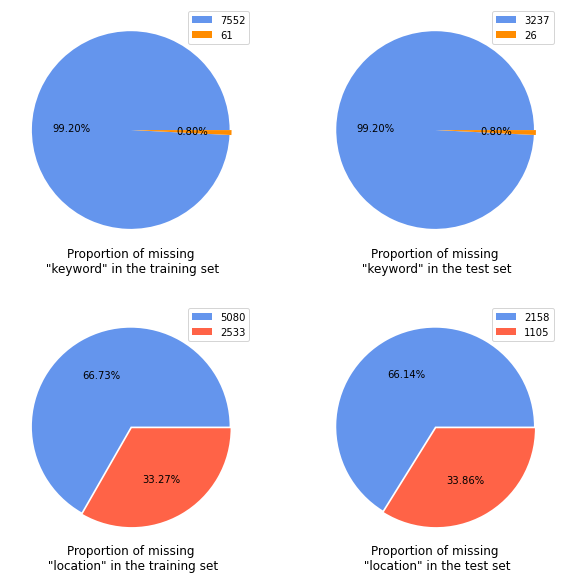

In [9]:
import matplotlib.pyplot as plt
# 显示缺失值
print("*"*20 + "【Display missing training data values】" + "*"*20)
Train_miss = Train_data.isnull().sum()
print(Train_miss)
Train_keyword_miss_number = Train_miss['keyword']
Train_location_miss_number = Train_miss['location']
print("*"*20 + "【Display missing test data values】" + "*"*20)
Test_miss = Test_data.isnull().sum()
print(Test_miss)
Test_keyword_miss_number = Test_miss['keyword']
Test_location_miss_number = Test_miss['location']


fig, ax = plt.subplots(figsize=(10,10),ncols=2,nrows=2)
# 显示训练集中'keyword'缺失比例
ax[0][0].pie([Total_train_number - Train_keyword_miss_number,Train_keyword_miss_number],colors = ['cornflowerblue','darkorange'],explode = (0,0.02),autopct = '%3.2f%%')
ax[0][0].legend([Total_train_number - Train_keyword_miss_number,Train_keyword_miss_number],loc='upper right')
ax[0][0].set_title('Proportion of missing\n "keyword" in the training set',y = -0.1)

# 显示测试集中'keyword'缺失比例
ax[0][1].pie([Total_test_number - Test_keyword_miss_number,Test_keyword_miss_number],colors = ['cornflowerblue','darkorange'],explode = (0,0.02),autopct = '%3.2f%%')
ax[0][1].legend([Total_test_number - Test_keyword_miss_number,Test_keyword_miss_number],loc='upper right')
ax[0][1].set_title('Proportion of missing\n "keyword" in the test set',y = -0.1)

# 显示训练集中'location'缺失比例
ax[1][0].pie([Total_train_number - Train_location_miss_number,Train_location_miss_number],colors = ['cornflowerblue','tomato'],explode = (0,0.02),autopct = '%3.2f%%')
ax[1][0].legend([Total_train_number - Train_location_miss_number,Train_location_miss_number],loc='upper right')
ax[1][0].set_title('Proportion of missing\n "location" in the training set',y = -0.1)

# 显示测试集中'location'缺失比例
ax[1][1].pie([Total_test_number - Test_location_miss_number,Test_location_miss_number],colors = ['cornflowerblue','tomato'],explode = (0,0.02),autopct = '%3.2f%%')
ax[1][1].legend([Total_test_number - Test_location_miss_number,Test_location_miss_number],loc='upper right')
ax[1][1].set_title('Proportion of missing\n "location" in the test set',y = -0.1)

plt.show()


"0" numbers : 【4342】
"1" numbers : 【3271】
********************************************************************************


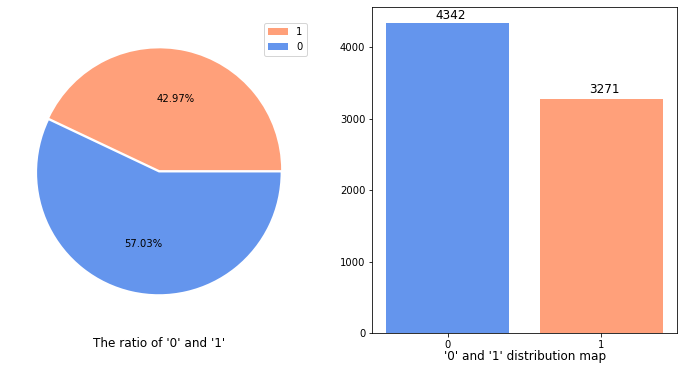

In [10]:
# 统计'0'，'1'个数
Target = Train_data.groupby(by='target').size()
ZeroNumber = Target[0]
OneNumber = Target[1]
print('"0" numbers : 【{}】'.format(ZeroNumber))
print('"1" numbers : 【{}】'.format(OneNumber))
print('*'*80)

# 饼图
fig,ax = plt.subplots(figsize = (12,6),nrows=1,ncols=2)
ax[0].pie([OneNumber,ZeroNumber],colors=['lightsalmon','cornflowerblue'],explode=(0,0.02),autopct = '%3.2f%%')
ax[0].legend(["1","0"],loc='best')
ax[0].set_title("The ratio of '0' and '1'",y = -0.1)

# 条形图
X = [0,1]
X_label = ['0','1']
Y = [ZeroNumber,OneNumber]
color = ['cornflowerblue','lightsalmon']
plt.xticks(X, X_label)
ax[1].bar(X,Y,color = color)
plt.text(-0.08,4400,ZeroNumber,fontsize = 12)
plt.text(0.92,3360,OneNumber,fontsize = 12)
ax[1].set_title("'0' and '1' distribution map",y = -0.1)
plt.show()

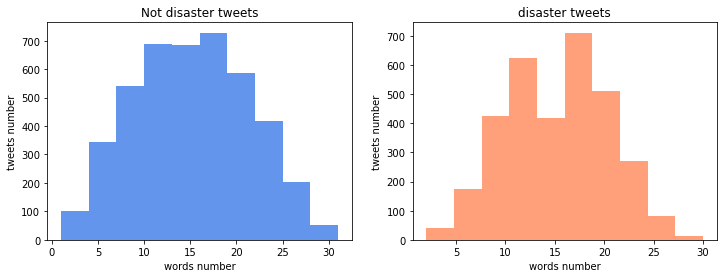

In [11]:
fig,ax = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
# tweet[target = 0]按单词数量分布
words_numbers0 = Train_data[Train_data.target == 0]['text'].str.split().map(lambda x:len(x))
ax[0].hist(words_numbers0,color = 'cornflowerblue')
ax[0].set_title("Not disaster tweets")
ax[0].set_xlabel('words number')
ax[0].set_ylabel('tweets number')

# tweet[target = 1]按单词数量分布
words_numbers1 = Train_data[Train_data.target == 1]['text'].str.split().map(lambda x:len(x))
ax[1].hist(words_numbers1,color = 'lightsalmon')
ax[1].set_title("disaster tweets")
ax[1].set_xlabel('words number')
ax[1].set_ylabel('tweets number')
plt.show()

In [12]:
words_numbers0

15       3
16       3
17       3
18       5
19       3
        ..
7581    13
7582    11
7584    13
7587     2
7593    12
Name: text, Length: 4342, dtype: int64

In [13]:
Text0 = Train_data[Train_data['target'] == 0]['text'].str.split()
Text1 = Train_data[Train_data['target'] == 1]['text'].str.split()
print("-"*15 + "【Not Disaster tweets】" + "-"*20)
print(Text0)
print("-"*20 + "【Disaster tweets】" + "-"*20)
print(Text1)

---------------【Not Disaster tweets】--------------------
15                                     [What's, up, man?]
16                                      [I, love, fruits]
17                                   [Summer, is, lovely]
18                                [My, car, is, so, fast]
19                       [What, a, goooooooaaaaaal!!!!!!]
                              ...                        
7581    [@engineshed, Great, atmosphere, at, the, Brit...
7582    [Cramer:, Iger's, 3, words, that, wrecked, Dis...
7584    [These, boxes, are, ready, to, explode!, Explo...
7587                                [Sirens, everywhere!]
7593    [I, just, heard, a, really, loud, bang, and, e...
Name: text, Length: 4342, dtype: object
--------------------【Disaster tweets】--------------------
0       [Our, Deeds, are, the, Reason, of, this, #eart...
1          [Forest, fire, near, La, Ronge, Sask., Canada]
2       [All, residents, asked, to, 'shelter, in, plac...
3       [13,000, people, receive,

In [14]:
def Creat_word_list(text):
  corpus = []
  for sentences in text:
    for words in sentences:
      corpus.append(words)
  return corpus

In [15]:
Corpus_zero = Creat_word_list(Text0)
Corpus_one = Creat_word_list(Text1)
print('Corpus_zero size : ',len(Corpus_zero))
print(Corpus_zero[:10])
print('Corpus_one size : ',len(Corpus_one))
print(Corpus_one[:10])

Corpus_zero size :  63848
["What's", 'up', 'man?', 'I', 'love', 'fruits', 'Summer', 'is', 'lovely', 'My']
Corpus_one size :  49613
['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'May', 'ALLAH']


In [16]:
# 语料库词频可视化函数
from collections import Counter
def Show_10words_frequency(corpus):
  result_list = Counter(corpus)
  counter_list = sorted(result_list.items(), key=lambda x: x[1], reverse=True)[:10]
  x,y = zip(*counter_list)
  plt.bar(x,y,color='lightsalmon')
  plt.show

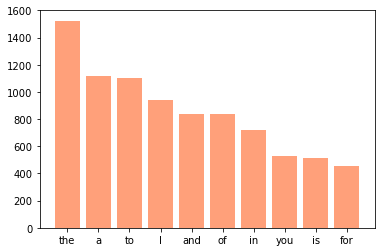

In [17]:
# 非灾难推特词频
Corpus_zero_fre = Show_10words_frequency(Corpus_zero)

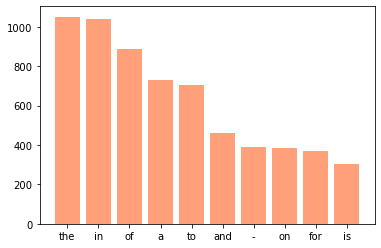

In [18]:
# 灾难推特词频
Corpus_one_fre = Show_10words_frequency(Corpus_one)

In [19]:
Keywords0 = Train_data[Train_data['target'] == 0]['keyword'].str.split()
Keywords1 = Train_data[Train_data['target'] == 1]['keyword'].str.split()
print(Keywords0)
print(Keywords1)

15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
          ...    
7581    [wrecked]
7582    [wrecked]
7584          NaN
7587          NaN
7593          NaN
Name: keyword, Length: 4342, dtype: object
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: keyword, Length: 3271, dtype: object


body%20bags    40
armageddon     37
harm           37
wrecked        36
ruin           36
deluge         36
siren          35
explode        35
twister        35
fear           35
screaming      34
panic          34
aftershock     34
blazing        33
blaze          33
Name: keyword, dtype: int64


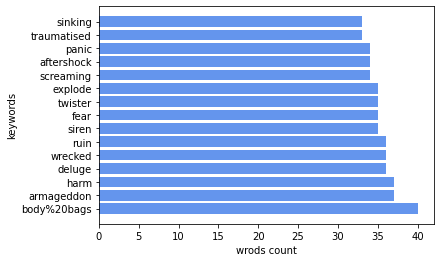

In [20]:
print(Train_data[Train_data['target'] == 0]['keyword'].value_counts()[0:15])
keyword_zero_list = Train_data[Train_data['target'] == 0]['keyword'].value_counts()[0:10]
y = ['body%20bags','armageddon','harm','deluge','wrecked','ruin','siren','fear','twister','explode','screaming','aftershock','panic','traumatised','sinking']

x = [40,37,37,36,36,36,35,35,35,35,34,34,34,33,33]

p1 = plt.bar(x=0, bottom=y, height=0.8, width=x, color = 'cornflowerblue',orientation="horizontal")
plt.xlabel("wrods count")
plt.ylabel("keywords")
plt.show()

wreckage               39
derailment             39
outbreak               39
oil%20spill            37
debris                 37
typhoon                37
evacuated              32
suicide%20bombing      32
rescuers               32
suicide%20bomb         32
nuclear%20disaster     31
razed                  31
airplane%20accident    30
earthquake             30
suicide%20bomber       30
Name: keyword, dtype: int64


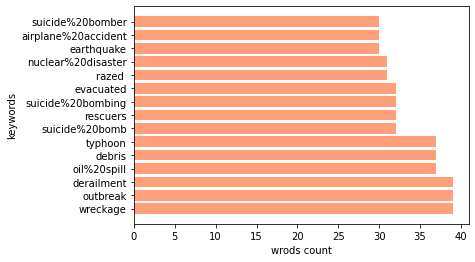

In [21]:
print(Train_data[Train_data['target'] == 1]['keyword'].value_counts()[0:15])
y = ['wreckage','outbreak','derailment','oil%20spill','debris','typhoon','suicide%20bomb','rescuers','suicide%20bombing','evacuated','razed ','nuclear%20disaster','earthquake','airplane%20accident','suicide%20bomber']

x = [39,39,39,37,37,37,32,32,32,32,31,31,30,30,30]

p1 = plt.bar(x=0, bottom=y, height=0.8, width=x, color = 'lightsalmon',orientation="horizontal")
plt.xlabel("wrods count")
plt.ylabel("keywords")
plt.show()

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
Florida            11
UK                 11
Name: location, dtype: int64


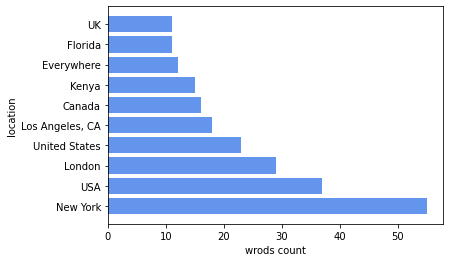

In [22]:
print(Train_data[Train_data['target'] == 0]['location'].value_counts()[0:10])
y = ['New York','USA','London','United States','Los Angeles, CA','Canada','Kenya','Everywhere','Florida','UK']

x = [55,37,29,23,18,16,15,12,11,11]

p1 = plt.bar(x=0, bottom=y, height=0.8, width=x, color = 'cornflowerblue',orientation="horizontal")
plt.xlabel("wrods count")
plt.ylabel("location")
plt.show()

USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
London            16
New York          16
UK                16
Washington, DC    15
Canada            13
Name: location, dtype: int64


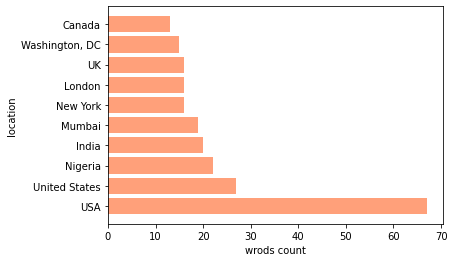

In [23]:
print(Train_data[Train_data['target'] == 1]['location'].value_counts()[0:10])
y = ['USA','United States','Nigeria','India','Mumbai','New York','London','UK','Washington, DC','Canada']

x = [67,27,22,20,19,16,16,16,15,13]

p1 = plt.bar(x=0, bottom=y, height=0.8, width=x, color = 'lightsalmon',orientation="horizontal")
plt.xlabel("wrods count")
plt.ylabel("location")
plt.show()

In [24]:
Train_data['keyword'].fillna('nokeyword', inplace = True)
Train_data['location'].fillna('nolocation',inplace = True)
Test_data['keyword'].fillna('nokeyword', inplace = True)
Test_data['location'].fillna('nolocation',inplace = True)

In [25]:
data = pd.concat([Train_data,Test_data])
data[:20]

,id,keyword,location,text,target
0,1,nokeyword,nolocation,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,nokeyword,nolocation,Forest fire near La Ronge Sask. Canada,1.0
2,5,nokeyword,nolocation,All residents asked to 'shelter in place' are ...,1.0
3,6,nokeyword,nolocation,"13,000 people receive #wildfires evacuation or...",1.0
4,7,nokeyword,nolocation,Just got sent this photo from Ruby #Alaska as ...,1.0
5,8,nokeyword,nolocation,#RockyFire Update => California Hwy. 20 closed...,1.0
6,10,nokeyword,nolocation,#flood #disaster Heavy rain causes flash flood...,1.0
7,13,nokeyword,nolocation,I'm on top of the hill and I can see a fire in...,1.0
8,14,nokeyword,nolocation,There's an emergency evacuation happening now ...,1.0
9,15,nokeyword,nolocation,I'm afraid that the tornado is coming to our a...,1.0


In [26]:
def Text2Lower(text):
  text = text.lower()
  return text

In [27]:
import re
def Transfer_Abbreviation(text):
  text = re.sub(r"can\'t", "can not", text)
  text = re.sub(r"cannot", "can not ", text)
  text = re.sub(r"what\'s", "what is", text)
  text = re.sub(r"there\'s", "there is", text)
  text = re.sub(r"there\'re", "there are", text)
  text = re.sub(r"it\'s", "it is", text)
  text = re.sub(r"\'ve ", " have ", text)
  text = re.sub(r"n\'t", " not ", text)
  text = re.sub(r"i\'m", "i am ", text)
  text = re.sub(r"I\'m", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)
  return text

In [28]:
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
def Remove_Stopping(text):
  cleaned_words = [word for word in text.split() if word not in stopwords.words('english')]
  return " ".join(cleaned_words)

[nltk_data] Downloading package wordnet to /Users/heda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/heda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
from string import punctuation
def Remove_Punctuation(text):
  text = re.sub(r'[^\w\s]', ' ', text)
  text = re.sub('_', ' ',text) 
  return text

In [30]:
def Remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [31]:
import emoji
def Transfer_Emoji(text):
  text = emoji.demojize(text)
  return text

In [32]:
EMOJI = "💣,🔥,🔫"
print("Original emoji: "+EMOJI)
print("After conversion: "+Transfer_Emoji(EMOJI))

Original emoji: 💣,🔥,🔫
After conversion: :bomb:,:fire:,:pistol:


In [33]:
def Remove_Html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [34]:
# from autocorrect import Speller

# spell = Speller(lang='en')
# def Text2Correct(text):
#     correct_words = []
#     for word in text.split():
#         correct_words.append(spell(word))
#     return " ".join(correct_words)

from spellchecker import SpellChecker
SC = SpellChecker()
def Text2Correct(text):
  correct_words = []
  wrong_words = SC.unknown(text.split())
  for word in text.split():
    if word in wrong_words:
      correct_words.append(SC.correction(word))
    else:
      correct_words.append(word)
  return ' '.join(correct_words)

In [35]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

In [36]:
class RepeatReplacer():
    def __init__(self):
        self.repeat_reg = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
    def replace(self, word):
        if wordnet.synsets(word):
            return word
        repl_word = self.repeat_reg.sub(self.repl, word)
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word
def Text2CorrectFormat(text):
  replacer = RepeatReplacer()
  return replacer.replace(text)

In [37]:
text = "<p>What a goooooooaaaaaal!!!!!! I'm lave Fruits Omg another Earthquake 😔😔  https://www.kaggle.com/c/nlp-getting-started </p>"
text = Remove_URL(text)
text = Remove_Html(text)
text = Text2Lower(text)
text = Transfer_Emoji(text)
text = Transfer_Abbreviation(text)
text = Remove_Stopping(text)
text = Text2CorrectFormat(text)
text = Text2Correct(text)
text = Remove_Punctuation(text)

text

'goal       have fruits omg another earthquake  pensive face  pensive face '

In [38]:
def combine_attributes(text, keyword,location):
    var_list = [text, keyword,location]
    combined = ' '.join(x for x in var_list if x)
    return combined
data['combine'] = data.apply(lambda x: combine_attributes(x['text'],x['keyword'],x['location']), axis = 1)

In [39]:
import time
start = time.clock()
# data['keyword'] = data['keyword'].apply(lambda x: Text2Lower(x))
# data['keyword'] = data['keyword'].apply(lambda x: Remove_Punctuation(x))

# data['location'] = data['location'].apply(lambda x: Text2Lower(x))
# data['location'] = data['location'].apply(lambda x: Remove_Punctuation(x))
# data['location'] = data['location'].apply(lambda x: Remove_URL(x))
# data['location'] = data['location'].apply(lambda x: Remove_Html(x))

data['combine'] = data['combine'].apply(lambda x: Remove_URL(x))
data['combine'] = data['combine'].apply(lambda x: Remove_Html(x))
data['combine'] = data['combine'].apply(lambda x: Text2Lower(x))
data['combine'] = data['combine'].apply(lambda x: Transfer_Emoji(x))
data['combine'] = data['combine'].apply(lambda x: Transfer_Abbreviation(x))
data['combine'] = data['combine'].apply(lambda x: Remove_Stopping(x))
# data['combine'] = data['combine'].apply(lambda x: Text2CorrectFormat(x))
# data['combine'] = data['combine'].apply(lambda x: Text2Correct(x))
data['combine'] = data['combine'].apply(lambda x: Remove_Punctuation(x))

clock1 = (time.clock() - start)
print("Time used:",clock1)

Time used: 24.762811999999997


In [40]:
data['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

In [41]:
data['combine']

0       deeds reason  earthquake may allah forgive us ...
1       forest fire near la ronge sask  canada nokeywo...
2       residents asked  shelter place  notified offic...
3       13 000 people receive  wildfires evacuation or...
4       got sent photo ruby  alaska smoke  wildfires p...
                              ...                        
3258    earthquake safety los angeles  ûò safety faste...
3259    storm ri worse last hurricane  city amp 3other...
3260    green line derailment chicago nokeyword noloca...
3261    meg issues hazardous weather outlook  hwo  nok...
3262     cityofcalgary activated municipal emergency p...
Name: combine, Length: 10876, dtype: object

In [42]:
from sklearn.model_selection import train_test_split

X = data['combine'][:len(Train_data)]
y = data['target'][:len(Train_data)]

X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, train_size=0.8,random_state = 6)

#输出数据集大小
print('Number of samples in the original dataset：',X.shape[0])
print('Number of training data samples：',X_train1.shape[0])
print('Number of samples of validation data：',X_val1.shape[0])

Number of samples in the original dataset： 7613
Number of training data samples： 6090
Number of samples of validation data： 1523


/Users/heda/anaconda3/envs/FP/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train1)
Combine_vec = vectorizer.transform(data['combine'])
X_val_vec = vectorizer.transform(X_val1)
Test_vec = vectorizer.transform(data['combine'][len(Train_data):])

In [44]:
print(X_train_vec)

  (0, 2753)	0.16329713638023605
  (0, 12804)	0.25563024384073857
  (0, 10302)	0.24878101601949312
  (0, 5799)	0.36839231950028806
  (0, 7058)	0.2769058887130568
  (0, 3744)	0.2644604342840903
  (0, 11864)	0.25563024384073857
  (0, 5003)	0.2769058887130568
  (0, 7945)	0.2769058887130568
  (0, 3599)	0.2062297262748566
  (0, 3773)	0.22750537114717484
  (0, 8529)	0.2644604342840903
  (0, 1786)	0.2644604342840903
  (0, 11483)	0.22750537114717484
  (0, 14657)	0.24318478941177205
  (1, 5753)	0.22832406309748673
  (1, 1860)	0.24672701145855358
  (1, 4750)	0.24551203243397762
  (1, 11211)	0.27936734252951556
  (1, 9370)	0.32002052956498594
  (1, 14701)	0.2968125355950967
  (1, 1718)	0.3288310632203934
  (1, 5509)	0.24207650108720344
  (1, 7767)	0.62564359881549
  (2, 14158)	0.27204832458211514
  :	:
  (6087, 1309)	0.3309547874322522
  (6087, 1193)	0.5017703033325482
  (6087, 7218)	0.30871638099181664
  (6087, 8830)	0.20148225181633664
  (6088, 4084)	0.22939970262764678
  (6088, 15647)	0.2072242

In [45]:
print(X_train_vec.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection

clf = SVC(kernel = 'linear')
clf.fit(X_train_vec, y_train1)
y_train_pred_svm = clf.predict(X_train_vec)
y_val_pred_svm = clf.predict(X_val_vec)
acc_score_svm1 = accuracy_score(y_train1,y_train_pred_svm)
acc_score_svm2 = accuracy_score(y_val1,y_val_pred_svm)
f1_score_svm = model_selection.cross_val_score(clf, X_train_vec, y_train1, cv=5, scoring="f1")
# scores = model_selection.cross_val_score(clf_xgb, X_train_vect, y_train, cv=5, scoring="f1")
print("Accuracy of SVM on training set: {}".format(acc_score_svm1))
print("Accuracy of SVM on validation set: {}".format(acc_score_svm2))
print("F1_score of SVM: {}".format(f1_score_svm))

log_reg = LogisticRegression()
log_reg.fit(X_train_vec, y_train1)
y_train_pred_LR = log_reg.predict(X_train_vec)
y_val_pred_LR = log_reg.predict(X_val_vec)
acc_score_LR1 = accuracy_score(y_train1,y_train_pred_LR)
acc_score_LR2 = accuracy_score(y_val1,y_val_pred_LR)
f1_score_LR = model_selection.cross_val_score(log_reg, X_train_vec, y_train1, cv=5, scoring="f1")
print("Accuracy of LR on training set: {}".format(acc_score_LR1))
print("Accuracy of LR on validation set: {}".format(acc_score_LR2))
print("F1_score of LR: {}".format(f1_score_LR))

Accuracy of SVM on training set: 0.9185550082101807
Accuracy of SVM on validation set: 0.7997373604727511
F1_score of SVM: [0.73259334 0.73598369 0.76494845 0.73761855 0.76464543]
Accuracy of LR on training set: 0.8840722495894909
Accuracy of LR on validation set: 0.7957977675640184
F1_score of LR: [0.71458333 0.72594142 0.75854701 0.7219193  0.73239437]


/Users/heda/anaconda3/envs/FP/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/heda/anaconda3/envs/FP/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val_pred_svm, y_val1, labels=None, sample_weight=None)

array([[751, 192],
       [113, 467]])

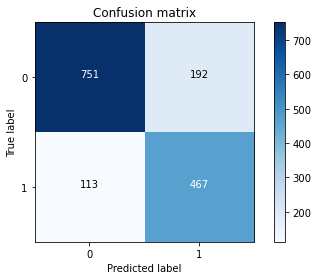

In [49]:
import matplotlib.pyplot as plt
from sklearn import model_selection
import itertools
classes = ["0","1"]
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Print the text of the matrix, adjusting text colour for display
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show
cm_svm = confusion_matrix(y_val_pred_svm, y_val1, labels=None, sample_weight=None)
plot_confusion_matrix(cm_svm,classes)

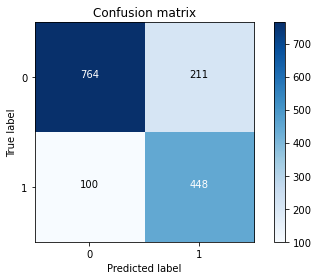

In [50]:
cm_LR = confusion_matrix(y_val_pred_LR, y_val1, labels=None, sample_weight=None)
plot_confusion_matrix(cm_LR,classes)

In [51]:
# import xgboost as xgb
# from sklearn import model_selection
# clf_xgb = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
#                         subsample=0.8, nthread=10, learning_rate=0.2)
# scores = model_selection.cross_val_score(clf_xgb, X_train_vect, y_train, cv=5, scoring="f1")
# scores

In [52]:
# y_test_pred = log_reg.predict(Test_vec)
# y_test_pred.shape
# sample_sub=pd.read_csv('sample_submission.csv')

In [53]:
# y_test_pred=np.round(y_test_pred).astype(int).reshape(3263)
# sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_test_pred})
# sub.to_csv('clean-tfidf-LR-submission.csv',index=False)
# sub.head()

In [54]:
# 创建清洗后的corpus
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from tqdm import tqdm
def create_corpus_new(df):
    corpus=[]
    for tweet in tqdm(df['combine']):
        corpus.append(tweet)
    return corpus
        
corpus_new = create_corpus_new(data)

[nltk_data] Downloading package punkt to /Users/heda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 10876/10876 [00:00<00:00, 1869482.82it/s]


In [55]:
len(corpus_new)

10876

In [56]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

Using TensorFlow backend.


In [57]:
# 将glove.txt转换成字典形式

embedding_dict={}
with open('glove.6B/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word = values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [58]:
embedding_dict['fire']

array([-2.6872e-01, -1.5542e-01, -2.3565e-01, -3.5982e-02, -3.9906e-01,
        5.2288e-01,  6.1285e-01,  4.2428e-01,  3.1335e-01,  4.3689e-01,
        3.4138e-01, -2.4277e-01,  6.1373e-01,  3.8125e-01,  1.1310e-01,
       -3.3607e-01,  1.0001e-03,  4.7615e-02, -1.2309e+00, -1.0720e-01,
        8.2273e-01, -7.9232e-01,  1.0403e-01, -5.1036e-01,  2.4042e-01,
        2.2254e-01, -1.0297e+00,  2.6352e-01, -2.8765e-01, -2.4815e-02,
       -2.1042e-01, -6.3753e-02, -3.1515e-01,  5.1925e-01, -3.6906e-01,
       -8.7828e-01, -1.0620e-01, -7.0078e-01,  9.8756e-01,  2.3399e-01,
       -3.5000e-01,  8.3742e-02,  1.5264e-01, -3.0398e-01,  1.2642e+00,
        1.4856e-01, -6.9123e-01,  5.0774e-02,  4.5135e-02, -7.3666e-01,
        2.9232e-01,  1.0271e-01, -3.1634e-01,  1.3542e+00,  4.0702e-01,
       -2.3607e+00,  3.1490e-01, -6.8612e-02,  1.6656e+00,  6.6895e-01,
        2.9794e-01,  8.5343e-01, -1.2086e-01,  5.9736e-01,  5.2690e-01,
        1.4765e-01,  5.3280e-01, -7.7097e-02, -4.6563e-02, -1.49

In [59]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus_new)
sequences=tokenizer_obj.texts_to_sequences(corpus_new)
tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [60]:
print( tokenizer_obj.word_counts) #单词在所有文档中的总数量，如果num_words=4，应该选择some thing to

OrderedDict([('deeds', 2), ('reason', 30), ('earthquake', 122), ('may', 115), ('allah', 11), ('forgive', 4), ('us', 202), ('nokeyword', 87), ('nolocation', 3640), ('forest', 182), ('fire', 468), ('near', 90), ('la', 56), ('ronge', 1), ('sask', 2), ('canada', 146), ('residents', 13), ('asked', 14), ('shelter', 9), ('place', 38), ('notified', 1), ('officers', 11), ('evacuation', 117), ('orders', 12), ('expected', 18), ('13', 41), ('000', 7), ('people', 285), ('receive', 3), ('wildfires', 16), ('california', 272), ('got', 163), ('sent', 15), ('photo', 66), ('ruby', 2), ('alaska', 18), ('smoke', 116), ('pours', 1), ('school', 88), ('rockyfire', 5), ('update', 53), ('hwy', 10), ('20', 34), ('closed', 27), ('directions', 1), ('due', 53), ('lake', 34), ('county', 82), ('cafire', 2), ('flood', 136), ('disaster', 270), ('heavy', 26), ('rain', 65), ('causes', 21), ('flash', 27), ('flooding', 113), ('streets', 11), ('manitou', 1), ('colorado', 67), ('springs', 11), ('areas', 13), ('top', 84), ('h

In [61]:
print( tokenizer_obj.word_docs) #单词出现在文档中的数量

defaultdict(<class 'int'>, {'deeds': 2, 'forgive': 4, 'earthquake': 77, 'may': 110, 'allah': 11, 'us': 193, 'nokeyword': 87, 'nolocation': 3640, 'reason': 30, 'forest': 106, 'la': 56, 'ronge': 1, 'fire': 341, 'sask': 2, 'canada': 144, 'near': 89, 'residents': 12, 'place': 37, 'shelter': 7, 'orders': 12, 'asked': 13, 'expected': 18, 'officers': 10, 'evacuation': 66, 'notified': 1, '000': 7, 'receive': 3, 'people': 277, 'california': 254, '13': 40, 'wildfires': 16, 'photo': 66, 'alaska': 16, 'got': 154, 'sent': 15, 'school': 85, 'pours': 1, 'smoke': 65, 'ruby': 2, 'due': 53, 'hwy': 10, '20': 34, 'update': 52, 'directions': 1, 'county': 81, 'lake': 32, 'closed': 25, 'cafire': 2, 'rockyfire': 5, 'heavy': 26, 'causes': 21, 'flood': 86, 'areas': 12, 'manitou': 1, 'streets': 11, 'colorado': 62, 'disaster': 195, 'rain': 61, 'flash': 27, 'springs': 10, 'flooding': 66, 'woods': 4, 'see': 147, 'top': 83, 'hill': 17, 'street': 42, 'happening': 18, 'emergency': 234, 'building': 44, 'across': 28, 't

In [62]:
word_index=tokenizer_obj.word_index
print(word_index)
print('Number of unique words:',len(word_index))

{'nolocation': 1, 's': 2, 'û': 3, 'new': 4, 'amp': 5, 'like': 6, 'fire': 7, 'usa': 8, 'emergency': 9, 'get': 10, 'via': 11, 'would': 12, '2': 13, 'body': 14, 'suicide': 15, 'news': 16, 'one': 17, 'people': 18, 'california': 19, 'disaster': 20, 'burning': 21, 'buildings': 22, 'police': 23, 'nuclear': 24, 'ca': 25, 'video': 26, 'york': 27, 'u': 28, '3': 29, 'storm': 30, 'first': 31, 'crash': 32, 'world': 33, 'attack': 34, 'mass': 35, 'city': 36, 'us': 37, 'bomb': 38, '1': 39, 'dead': 40, 'forest': 41, 'still': 42, 'london': 43, 'accident': 44, 'rt': 45, 'time': 46, 'back': 47, 'got': 48, 'know': 49, 'united': 50, 'war': 51, 'day': 52, 'collapse': 53, 'fires': 54, 'i': 55, 'army': 56, 'man': 57, 'two': 58, 'death': 59, 'love': 60, '5': 61, 'see': 62, 'uk': 63, 'going': 64, 'today': 65, 'bombing': 66, 'wildfire': 67, 'canada': 68, 'go': 69, 'it': 70, 'year': 71, 'hiroshima': 72, 'full': 73, 'fatal': 74, '4': 75, 'life': 76, 'youtube': 77, 'a': 78, 'wild': 79, '20fires': 80, 'old': 81, 'flo

In [63]:
print(data['combine'][0:5])
print(tweet_pad[0:5])

0    deeds reason  earthquake may allah forgive us ...
1    forest fire near la ronge sask  canada nokeywo...
2    residents asked  shelter place  notified offic...
3    13 000 people receive  wildfires evacuation or...
4    got sent photo ruby  alaska smoke  wildfires p...
Name: combine, dtype: object
[[6358  867  104  127 1981 4157   37  334    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  41    7  319  496 9359 6359   68  334    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [1747 1645 2306  713 9360 1982  118 2306  713 1860 1347  334    1    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   

In [64]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec      

100%|██████████| 23696/23696 [00:00<00:00, 412004.38it/s]


In [65]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(lr=3e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2369700   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 2,450,201
Trainable params: 80,501
Non-trainable params: 2,369,700
_________________________________________________________________


In [67]:
train=tweet_pad[:Train_data.shape[0]]
test=tweet_pad[Train_data.shape[0]:]

In [68]:
train.shape

(7613, 50)

In [69]:
test.shape

(3263, 50)

In [70]:
X_train2,X_val2,y_train2,y_val2=train_test_split(train,Train_data['target'].values,test_size=0.2,random_state = 6)
print('Shape of train',X_train2.shape)
print("Shape of Validation ",X_val2.shape)

Shape of train (6090, 50)
Shape of Validation  (1523, 50)


In [71]:
X_train2

array([[ 2073,  1831,  3111, ...,     0,     0,     0],
       [ 2033,   387,  3640, ...,     0,     0,     0],
       [16836,    45,   139, ...,     0,     0,     0],
       ...,
       [ 9607,  9608,  6466, ...,     0,     0,     0],
       [  442,   152,   366, ...,     0,     0,     0],
       [   90,    88,  3302, ...,     0,     0,     0]], dtype=int32)

In [72]:
history=model.fit(X_train2,y_train2,batch_size=10,epochs=20,validation_data=(X_val2,y_val2),verbose=2)

Train on 6090 samples, validate on 1523 samples
Epoch 1/20
 - 54s - loss: 0.5819 - accuracy: 0.7008 - val_loss: 0.5429 - val_accuracy: 0.7426
Epoch 2/20
 - 63s - loss: 0.5429 - accuracy: 0.7507 - val_loss: 0.5405 - val_accuracy: 0.7551
Epoch 3/20
 - 56s - loss: 0.5300 - accuracy: 0.7565 - val_loss: 0.5035 - val_accuracy: 0.7794
Epoch 4/20
 - 56s - loss: 0.5165 - accuracy: 0.7639 - val_loss: 0.5023 - val_accuracy: 0.7787
Epoch 5/20
 - 56s - loss: 0.5071 - accuracy: 0.7645 - val_loss: 0.4891 - val_accuracy: 0.7794
Epoch 6/20
 - 57s - loss: 0.5152 - accuracy: 0.7688 - val_loss: 0.5001 - val_accuracy: 0.7833
Epoch 7/20
 - 55s - loss: 0.5027 - accuracy: 0.7654 - val_loss: 0.4743 - val_accuracy: 0.7938
Epoch 8/20
 - 54s - loss: 0.4951 - accuracy: 0.7795 - val_loss: 0.4723 - val_accuracy: 0.7905
Epoch 9/20
 - 54s - loss: 0.4927 - accuracy: 0.7787 - val_loss: 0.4771 - val_accuracy: 0.7886
Epoch 10/20
 - 54s - loss: 0.4843 - accuracy: 0.7806 - val_loss: 0.4749 - val_accuracy: 0.7715
Epoch 11/20

In [73]:
val_pred_GloVe = model.predict(X_val2)
val_pred_GloVe_int = val_pred_GloVe.round().astype('int')
Glove_pred = val_pred_GloVe_int.tolist()

print(Glove_pred)

[[0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [0], [0], [1], [0], [1], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [1], [1], [1], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [1], [0], [0], [1], [1], [1], [1], [1], [1], [1], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [1], [1], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [1], [1], [0], [0], [1], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [1], [0],

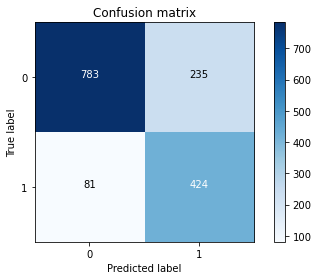

In [74]:
import matplotlib.pyplot as plt
import itertools
classes = ["0","1"]
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Print the text of the matrix, adjusting text colour for display
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show
cm = confusion_matrix(Glove_pred,y_val2, labels=None, sample_weight=None)
plot_confusion_matrix(cm,classes)

In [75]:
# Test_pred_GloVe = model.predict(test)
# Test_pred_GloVe_int = Test_pred_GloVe.round().astype('int')
# sample_sub=pd.read_csv('sample_submission.csv')
# sample_sub['target'] = Test_pred_GloVe_int
# sample_sub.head(10)

In [76]:
# sample_sub.to_csv("gloves-submission.csv", index=False, header=True)

In [77]:
# X_train2,X_val2,y_train2,y_val2
# clf2 = SVC(kernel = 'linear')
# clf.fit(X_train2, y_train2)
# y_train_pred_Gsvm = clf2.predict(X_train2)
# y_val_pred_Gsvm = clf2.predict(X_val2)
# f1_score_Gsvm = f1_score(y_val2,y_val_pred_Gsvm)
# print("F1_score of SVM: {}".format(f1_score_Gsvm))

# log_reg2 = LogisticRegression()
# log_reg.fit(X_train_vec, y_train1)
# y_train_pred_GLR = log_reg2.predict(X_train2)
# y_val_pred_GLR = log_reg2.predict(X_val2)
# f1_score_GLR = f1_score(y_val2,y_val_pred_GLR)
# print("F1_score of LR: {}".format(f1_score_GLR))